In [ ]:
#this column for adding - installing we found exactly correct location of files
%cd /content
!ls -a

/content
.   11111.jpg  Dataset	    retinaface.h5    sample_data
..  .config    Dataset.zip  sametsarial.mp4


In [ ]:
!gdown --id 1nmLc8_Xgj7jFBffjKqsMXYXWZpiTzgut
!unzip /content/Dataset.zip
#dataset import from the driver

Görüntülenen çıkış son 5000 satıra kısaltıldı.
 extracting: Dataset/with_mask/Augmented_174_8862116.png  
 extracting: Dataset/with_mask/Augmented_174_936727.png  
 extracting: Dataset/with_mask/Augmented_175_1905603.png  
 extracting: Dataset/with_mask/Augmented_175_5746201.png  
 extracting: Dataset/with_mask/Augmented_175_7003720.png  
 extracting: Dataset/with_mask/Augmented_175_7535472.png  
  inflating: Dataset/with_mask/Augmented_175_8019231.png  
 extracting: Dataset/with_mask/Augmented_176_1044976.png  
 extracting: Dataset/with_mask/Augmented_176_737534.png  
 extracting: Dataset/with_mask/Augmented_176_7922582.png  
 extracting: Dataset/with_mask/Augmented_176_82258.png  
 extracting: Dataset/with_mask/Augmented_176_8587186.png  
 extracting: Dataset/with_mask/Augmented_176_9809672.png  
 extracting: Dataset/with_mask/Augmented_177_6105722.png  
 extracting: Dataset/with_mask/Augmented_177_6518803.png  
 extracting: Dataset/with_mask/Augmented_177_8071039.png  
 extracting: 

In [ ]:
import cv2
import tensorflow as tf
import numpy as np
import glob
import os.path
from glob import glob
import matplotlib.pyplot as plt

from fdet.utils.io import VideoHandle
from sklearn.metrics import classification_report
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from kora.drive import upload_public
from IPython.display import HTML

In [ ]:
batch_size = 32
epoch = 2
num_classes = 2
step_per_epoch = len(glob('/content/Dataset/*/*'))//batch_size

image_h, image_w = 128, 128
classes = sorted(['with_mask','without_mask'])
print(step_per_epoch)

504


In [ ]:
def read_img(image_path):
  img = tf.io.read_file(image_path)
  img = tf.image.decode_image(img, channels=3)
  img.set_shape([None,None,3])
  img = tf.image.resize(img, [image_w, image_h])
  img  = img/127.5-1
  return img

label_map = {v:i for i, v in enumerate(classes)}

images = glob('/content/Dataset/*/*')
np.random.shuffle(images)

labels = [label_map[x.split('/')[-2]] for x in images]

(train_images, test_images, train_labels, test_labels) = train_test_split(images, labels,
	test_size=0.10, stratify=labels, random_state=42)

#reading image and label
def load_data(image_path, label):
  image = read_img(image_path)
  return image, label

print('TOTAL IMAGE NUMBER = '+str(len(images)))
print('TRAIN IMAGES  = '+str(len(train_images)))
print('TOTAL IMAGES = '+str(len(test_images)))

TOTAL IMAGE NUMBER = 16159
TRAIN IMAGES  = 14543
TOTAL IMAGES = 1616


In [ ]:
def data_generator(features,labels):
  dataset = tf.data.Dataset.from_tensor_slices((features,labels))
  dataset = dataset.shuffle(buffer_size=100)
  autotune = tf.data.experimental.AUTOTUNE
  dataset = dataset.map(load_data, num_parallel_calls=autotune)
  dataset = dataset.batch(batch_size=batch_size)
  dataset = dataset.repeat()
  dataset = dataset.prefetch(autotune)
  return dataset

[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 

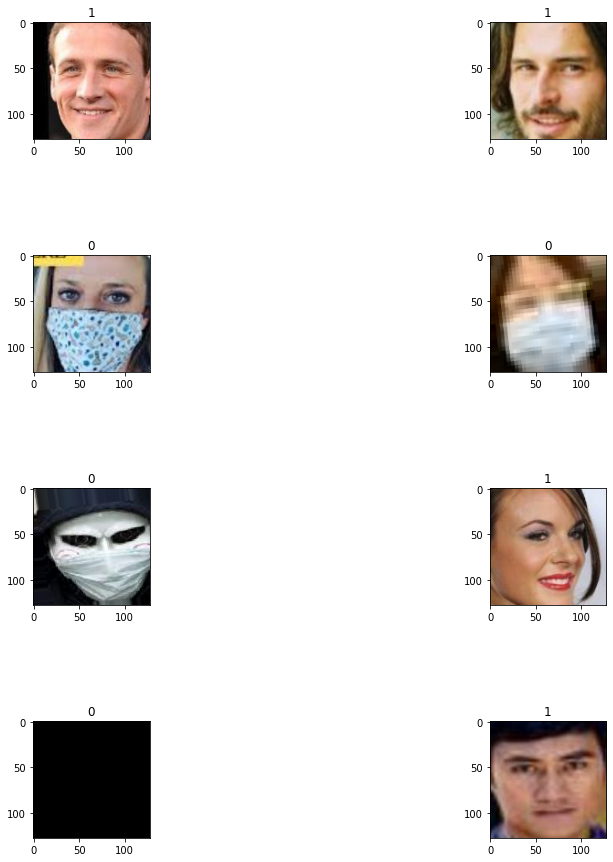

In [ ]:

print(train_labels)
def show_img(dataset):
  plt.figure(figsize=(15,15))
  for i in range(8):
    for val in dataset.take(1):
      img  = (val[0][i]+1)*127.5
      plt.subplot(4,2,i+1)
      plt.imshow(tf.cast(img,tf.uint8))
      plt.title(val[1][i].numpy())
      plt.subplots_adjust(hspace=1)
  plt.show()

train_dataset = data_generator(train_images,train_labels)

show_img(train_dataset)
print(train_images)


# **MODAL**

In [ ]:
base_model = tf.keras.applications.Xception(include_top=False,
                                       input_shape=(None, None, 3),
                                       weights='imagenet')
base_model.trainable = False
layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
layer = tf.keras.layers.Dense(1024, activation='relu')(layer)
layer = tf.keras.layers.Dropout(0.5)(layer)
output = tf.keras.layers.Dense(num_classes, activation='softmax')(layer)
model = tf.keras.models.Model(base_model.inputs,output)
model.summary()

['/content/Dataset/with_mask/Augmented_617_5029448.png', '/content/Dataset/without_mask/77.png', '/content/Dataset/without_mask/1_0_aidai_0180.jpg', '/content/Dataset/without_mask/1_0_shenmengchen_0009.jpg', '/content/Dataset/without_mask/1_0_aidai_0110.jpg', '/content/Dataset/without_mask/1_0_sunyue_0062.jpg', '/content/Dataset/with_mask/Augmented_566_7700443.png', '/content/Dataset/without_mask/0_0_maoxiaotong_0051.jpg', '/content/Dataset/without_mask/1_0_chenyufan_0057.jpg', '/content/Dataset/without_mask/295.jpg', '/content/Dataset/with_mask/0_0_5 copy 19.jpg', '/content/Dataset/without_mask/1340.png', '/content/Dataset/without_mask/1_0_make_0164.jpg', '/content/Dataset/without_mask/0_0_dongchengpeng_0021.jpg', '/content/Dataset/with_mask/Augmented_423_5573198.png', '/content/Dataset/with_mask/Augmented_354_5388559.png', '/content/Dataset/with_mask/Augmented_468_3094298.png', '/content/Dataset/with_mask/0_0_4eb80259gy1gbltrosayaj22ds1scx6p.jpg', '/content/Dataset/with_mask/335.jpg'

In [ ]:
#We can use learning rate scheduler here like Cyclical Learning Rate(available in Tf Addons)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4, decay=1e-4 / epoch),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint('mask_classification_model.h5', 
                                       save_best_only=True, 
                                       save_weights_only=True,
                                       monitor='loss')]

model.fit(train_dataset,
          batch_size=batch_size,
          epochs=epoch,steps_per_epoch=step_per_epoch,
          callbacks=callbacks)

Epoch 1/2
504/504 [==============================] - 57s 103ms/step - loss: 0.0429 - accuracy: 0.9849
Epoch 2/2
504/504 [==============================] - 51s 101ms/step - loss: 0.0178 - accuracy: 0.9953


<TakeDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>


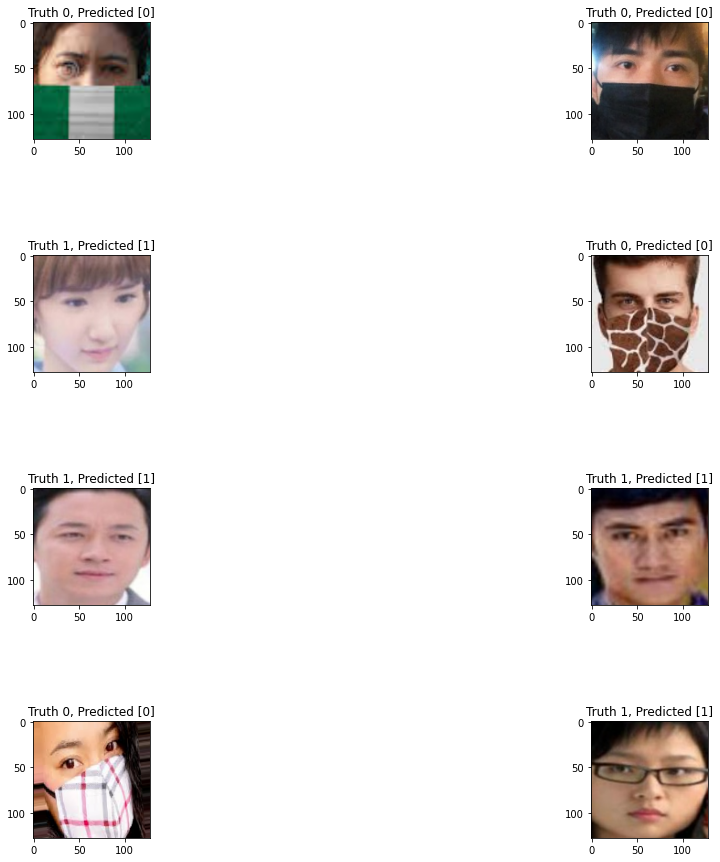

In [ ]:
print(train_dataset.take(1))
plt.figure(figsize=(15,15))
for i in range(8):
  for val in train_dataset.take(1):
    plt.subplot(4,2,i+1)
    img  = (val[0][i]+1)*127.5
    plt.imshow(tf.cast(img,tf.uint8))
    y_pred = model.predict(np.expand_dims(val[0][i],axis=0))
    y_pred = np.argmax(y_pred,axis=1)
    plt.title('Truth {}, Predicted {}'.format(val[1][i],y_pred))
    plt.subplots_adjust(wspace=1, hspace=1)
plt.show()

In [ ]:
pred_labels = []
for image_path in (test_images):
  image = read_img(image_path)
  y_pred = model.predict(np.expand_dims(image,axis=0))
  y_pred = np.argmax(y_pred,axis=1)
  pred_labels.append(y_pred)

print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       807
           1       0.99      1.00      1.00       809

    accuracy                           1.00      1616
   macro avg       1.00      1.00      1.00      1616
weighted avg       1.00      1.00      1.00      1616



In [ ]:
class_map = {
    0: 'mask',
    1: 'no-mask'
    }

color_map_video = {
    0: (0,255,0),
    1:(0,0,255)
    }

color_map_image = {
    0: [0,1,0],
    1:[1,0,0]
    }


In [ ]:
def visualize_detections(image, boxes):
  figsize=(7, 7)
  linewidth=1
  image = np.array(image, dtype=np.uint8)
  plt.figure(figsize=figsize)
  plt.axis('off')
  plt.imshow(image)
  ax = plt.gca()

  for box in boxes:
    x, y, w, h = box
 
    face_image = image[y:y+h,x:x+w]

    if face_image.shape[0] and face_image.shape[1]:

      face_image = tf.image.resize(face_image, [image_w, image_h])
      face_image = face_image/127.5-1

      _cls = model.predict(np.expand_dims(face_image,axis=0))
      _cls = np.argmax(_cls,axis=1)
      
      text = '{}'.format(class_map[_cls[0]])

      patch = plt.Rectangle([x, y], w-x, h-y, fill=False, 
                            edgecolor=color_map_image[_cls[0]], linewidth=linewidth)
      ax.add_patch(patch)
      ax.text(x, y, text, bbox={'facecolor':color_map_image[_cls[0]], 'alpha':0.2}, 
          clip_box=ax.clipbox, clip_on=True)
  

def visualize_detections_video(image, boxes):
  
  image = np.array(image, dtype=np.uint8)
  
  for box in boxes:
    x, y, w, h = box    
    face_image = image[y:y+h,x:x+w] 
    if w<90 or h<90:
      w = (w*0.5)+w
      h = (h*0.5)+h

    #To handle those cases where the  height and width of the generated cropped face become 0
    if face_image.shape[0] and face_image.shape[1]:
      face_image = tf.image.resize(face_image, [image_w, image_h])
      face_image = face_image/127.5-1
      
      _cls = model.predict(np.expand_dims(face_image,axis=0))
      _cls = np.argmax(_cls,axis=1)

      text = '{}'.format(class_map[_cls[0]])    
      start = tuple(np.array((x,y)).astype('int'))
      end = tuple(np.array((w,h)).astype('int'))
      
      cv2.rectangle(image,start,end,color_map_video[_cls[0]],1)
      cv2.putText(image, class_map[_cls[0]], start , cv2.FONT_HERSHEY_SIMPLEX, 0.4, color_map_video[_cls[0]], 1)
  return (image)

In [ ]:
!unzip /content/CrowdMaskDetection.zip


unzip:  cannot find or open /content/CrowdMaskDetection.zip, /content/CrowdMaskDetection.zip.zip or /content/CrowdMaskDetection.zip.ZIP.


In [ ]:
!pip install retina-face

In [ ]:
#goes to installed path for setup model face detection
%cd /root/.deepface/weights/
!ls -a

/root/.deepface/weights
.  ..  retinaface.h5


In [ ]:
!gdown --id 1eXMNSbouU8__UJLCbP0gbhcXgcV9sZfY
 #manually installing to the root/.cache file 

Downloading...
From: https://drive.google.com/uc?id=1eXMNSbouU8__UJLCbP0gbhcXgcV9sZfY
To: /root/.deepface/weights/retinaface.h5
119MB [00:00, 223MB/s]


In [ ]:
from retinaface import RetinaFace
import numpy as np 
import cv2
image_face_path = "/content/11111.jpg"


resp = RetinaFace.detect_faces(image_face_path)
print(resp)

{'face_1': {'score': 0.9988580942153931, 'facial_area': [140, 246, 478, 704], 'landmarks': {'right_eye': [206.63387, 446.91095], 'left_eye': [353.52325, 419.70746], 'nose': [279.79077, 533.59467], 'mouth_right': [246.66391, 595.78107], 'mouth_left': [379.9607, 572.1741]}}}


In [ ]:
boxes = []
for i in resp:
  print(resp[i]['facial_area'])
  boxes.append(resp[i]['facial_area'])

i = image_face_path
boxes = np.array(boxes)
image = cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2RGB)
print(boxes)


[140, 246, 478, 704]
[[140 246 478 704]]


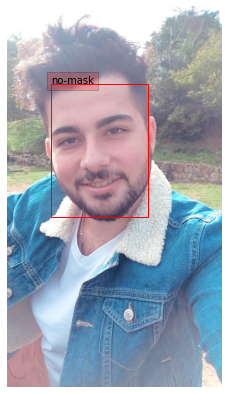

In [ ]:
from glob import glob

image_path = '/content/11111.jpg'

for i in glob(image_path):
  image = cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2RGB)
  
  result = RetinaFace.detect_faces(image)

  boxes = []
  for i in result:
    boxes.append(result[i]['facial_area'])
  boxes = np.array(boxes)

  visualize_detections(image, boxes)

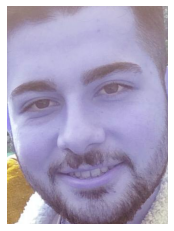

In [ ]:
import matplotlib.pyplot as plt


faces = RetinaFace.extract_faces(img_path = image_path, align = False)
i=1
for face in faces:
  plt.axis('off')
  plt.imshow(face)
  plt.savefig('/content/deneme/'+str(i)+'_face.jpg',bbox_inches='tight',transparent=True, pad_inches=0)
  plt.show()
  i=i+1



# **FACE DIVISION AND TESTING FACES**

In [ ]:
import matplotlib.pyplot as plt
crowded_image = "/content/mask2.jpg"

faces = RetinaFace.extract_faces(img_path = image_path, align = False)
i=1
for face in faces:
  plt.axis('off')
  plt.imshow(face)
  division_path = plt.savefig('/content/deneme/'+str(i)+'_face.jpg',bbox_inches='tight',transparent=True, pad_inches=0)
  plt.show()
  i=i+1

In [ ]:

image_path = '/content/11111.jpg'

for i in glob(image_path):
  image = cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2RGB)
  
  result = RetinaFace.detect_faces(image)
  
  boxes = []
  for i in result:
    print(i)
    boxes.append(result[i]['facial_area'])
  boxes = np.array(boxes)

  visualize_detections(image, boxes)

In [ ]:

image_path = '/content/deneme/*'

for i in glob(image_path):
  image = cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2RGB)
  
  result = RetinaFace.detect_faces(image)
  print(result)
  boxes = []
  for i in result:
    print(result[i]['facial_area'])
    boxes.append(result[i]['facial_area'])
  boxes = np.array(boxes)

  visualize_detections(image, boxes)

# **VIDEO CONTROL WITH FFMPEG**

In [ ]:
!gdown --id 1DTHfr67AWQdAngqPGAlAzwI--c6rIZER

Downloading...
From: https://drive.google.com/uc?id=1DTHfr67AWQdAngqPGAlAzwI--c6rIZER
To: /root/.deepface/weights/Istanbul - 26920.mp4
9.18MB [00:00, 148MB/s]


In [ ]:
!ls -a

 .   ..  'Istanbul - 26920.mp4'   output.mp4   retinaface.h5   sametsarial.mp4


In [ ]:
#sametsarial masked video
!gdown --id 1T0T8_KhdXqZdgy7zu5mu95zdXMkXuyRZ

Downloading...
From: https://drive.google.com/uc?id=1T0T8_KhdXqZdgy7zu5mu95zdXMkXuyRZ
To: /root/.deepface/weights/sametsarial.mp4
2.22MB [00:00, 141MB/s]


In [ ]:
video_source = "/content/Istanbul - 26920.mp4"

cap = cv2.VideoCapture(video_source)
img_array = []

while True:
  _, image = cap.read()
  if not _:
    break
  w, h = image.shape[0], image.shape[1] 
  result = RetinaFace.detect_faces(image)

  boxes = []
  for i in result:
    boxes.append(result[i]['facial_area'])
  boxes = np.array(boxes)
  img=visualize_detections_video(image, boxes)
  img_array.append(img)
 
out = cv2.VideoWriter('/content/mask.avi', 0, 24, (h,w))

for i in range(len(img_array)):
  out.write(img_array[i])

out.release()

In [ ]:
!ls -a

 .   ..  'Istanbul - 26920.mp4'   output.mp4   retinaface.h5   sametsarial.mp4


In [ ]:
!ffmpeg -i /content/mask.avi output.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
!ls -a

 .   ..  'Istanbul - 26920.mp4'   output.mp4   retinaface.h5   sametsarial.mp4


In [ ]:
from google.colab import files
files.download('output.mp4') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>